## Supervised Composite Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
decision_tree_score = pd.read_csv('decision_tree_scores.csv')

In [3]:
decision_tree_score.rename(columns={'G_score_tree': 'decision_tree_score'}, inplace=True)
decision_tree_score

,State,decision_tree_score
0,oklahoma,0.009714
1,texas,0.008836
2,kansas,0.008253
3,washington,0.008145
4,connecticut,0.008005
5,iowa,0.007841
6,utah,0.007698
7,colorado,0.007239
8,virginia,0.007118
9,nebraska,0.006454


In [4]:
rf_score = pd.read_csv('rf_proximity_scores.csv')
rf_score.rename(columns={'G_score': 'rf_score'}, inplace=True)
rf_score

,State,rf_score
0,colorado,0.007375
1,washington,0.007351
2,maryland,0.007304
3,california,0.006839
4,georgia,0.006702
5,florida,0.006586
6,ohio,0.006440
7,montana,0.006364
8,idaho,0.006287
9,utah,0.006231


In [5]:
xgb_score = pd.read_csv('xgboost_scores.csv')
xgb_score.rename(columns={'G_score': 'xgb_score'}, inplace=True)

In [6]:
xgb_score

,State,xgb_score
0,kansas,0.008677
1,washington,0.008037
2,texas,0.007974
3,connecticut,0.007590
4,utah,0.007404
5,oregon,0.006960
6,oklahoma,0.006881
7,nebraska,0.006356
8,colorado,0.006013
9,idaho,0.005907


In [7]:
gpr_score = pd.read_csv('gpr_state_scores.csv')
gpr_score.rename(columns={'G_score': 'gpr_score'}, inplace=True)
gpr_score

,State,gpr_score
0,kansas,0.007311
1,kentucky,0.006176
2,tennessee,0.006045
3,indiana,0.005775
4,texas,0.005761
5,oklahoma,0.005755
6,colorado,0.005725
7,nebraska,0.005724
8,connecticut,0.005681
9,maine,0.005629


In [8]:
merged_df = decision_tree_score.merge(gpr_score, on='State') \
                               .merge(rf_score, on='State') \
                               .merge(xgb_score, on='State')
merged_df

,State,decision_tree_score,gpr_score,rf_score,xgb_score
0,oklahoma,0.009714,0.005755,0.005911,0.006881
1,texas,0.008836,0.005761,0.004924,0.007974
2,kansas,0.008253,0.007311,0.003484,0.008677
3,washington,0.008145,0.005299,0.007351,0.008037
4,connecticut,0.008005,0.005681,0.004731,0.007590
5,iowa,0.007841,0.005556,0.004613,0.005804
6,utah,0.007698,0.003424,0.006231,0.007404
7,colorado,0.007239,0.005725,0.007375,0.006013
8,virginia,0.007118,0.004635,0.006203,0.005872
9,nebraska,0.006454,0.005724,0.004647,0.006356


In [9]:
merged_df.to_csv('merged_scores.csv', index=False)

In [10]:
# 2) Define the four model columns and equal initial weights
model_cols = ["decision_tree_score", "gpr_score", "rf_score", "xgb_score"]
weights    = np.array([0.25, 0.25, 0.25, 0.25])

# 3) Compute composite score
merged_df["composite_score"] = merged_df[model_cols].values.dot(weights)
merged_df

,State,decision_tree_score,gpr_score,rf_score,xgb_score,composite_score
0,oklahoma,0.009714,0.005755,0.005911,0.006881,0.007065
1,texas,0.008836,0.005761,0.004924,0.007974,0.006874
2,kansas,0.008253,0.007311,0.003484,0.008677,0.006931
3,washington,0.008145,0.005299,0.007351,0.008037,0.007208
4,connecticut,0.008005,0.005681,0.004731,0.007590,0.006502
5,iowa,0.007841,0.005556,0.004613,0.005804,0.005953
6,utah,0.007698,0.003424,0.006231,0.007404,0.006189
7,colorado,0.007239,0.005725,0.007375,0.006013,0.006588
8,virginia,0.007118,0.004635,0.006203,0.005872,0.005957
9,nebraska,0.006454,0.005724,0.004647,0.006356,0.005795


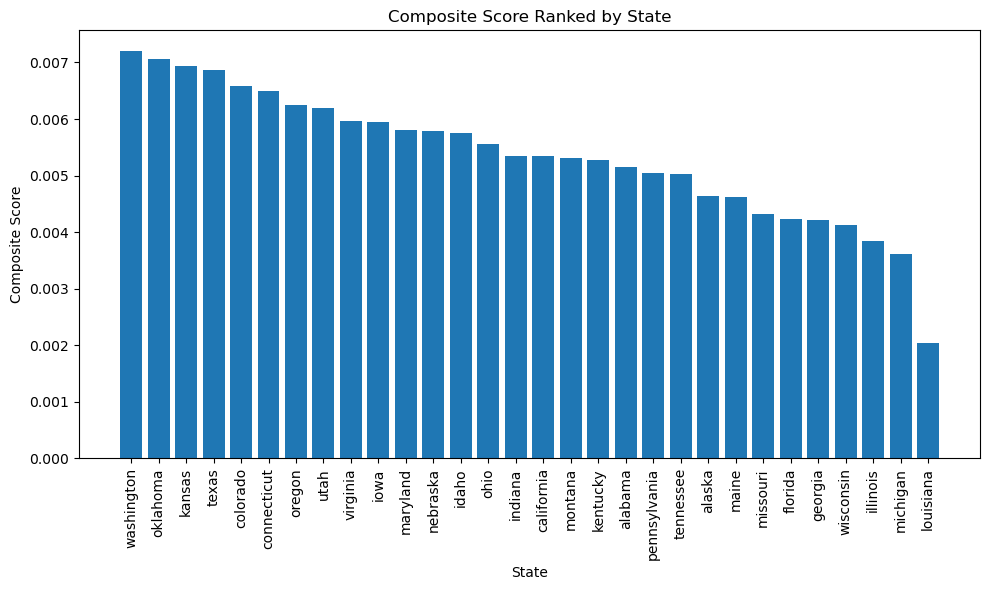

In [14]:
# Sort the merged DataFrame by composite_score in descending order
sorted_df = merged_df.sort_values(by='composite_score', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_df['State'], sorted_df['composite_score'])
plt.xlabel('State')
plt.ylabel('Composite Score')
plt.title('Composite Score Ranked by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
median_composite_score = merged_df['composite_score'].median()
print("Median of composite_score:", median_composite_score)
c_threshold = median_composite_score

Median of composite_score: 0.005351867902883263


In [13]:
group_1_supervised = merged_df.loc[merged_df['composite_score'] > median_composite_score, 'State'].values
group_0_supervised = merged_df.loc[merged_df['composite_score'] <= median_composite_score, 'State'].values

print("Group 1:", group_1_supervised)
print("Group 0:", group_0_supervised)

Group 1: ['oklahoma' 'texas' 'kansas' 'washington' 'connecticut' 'iowa' 'utah'
 'colorado' 'virginia' 'nebraska' 'oregon' 'ohio' 'maryland' 'idaho'
 'indiana']
Group 0: ['california' 'kentucky' 'alabama' 'pennsylvania' 'tennessee' 'maine'
 'montana' 'wisconsin' 'alaska' 'missouri' 'florida' 'michigan' 'illinois'
 'georgia' 'louisiana']


## Validity Test

In [16]:
merged_panel = pd.read_csv('merged_panel.csv')
merged_panel

,State,YearQuarter,assetquality_diff,profitability_diff,low_diff,GDP_pre
0,alabama,2005Q2,0.000109,0.000935,0.00,0.009316
1,alabama,2005Q3,0.000109,0.000935,-0.10,-0.003531
2,alabama,2005Q4,0.000109,0.000935,0.00,0.011281
3,alabama,2006Q1,-0.000342,-0.000149,0.00,0.000625
4,alabama,2006Q2,-0.000342,-0.000149,0.00,0.004461
...,...,...,...,...,...,...
385,wisconsin,2007Q2,0.001435,-0.001901,0.08,0.002859
386,wisconsin,2007Q3,0.001435,-0.001901,0.00,0.004935
387,wisconsin,2007Q4,0.001435,-0.001901,0.00,-0.000746
388,wisconsin,2008Q1,0.015003,-0.012405,0.00,-0.006978


In [17]:
state_gdp_mean = merged_panel.groupby("State")["GDP_pre"].mean().reset_index()
state_gdp_mean

,State,GDP_pre
0,alabama,0.003042
1,alaska,0.005985
2,california,0.007819
3,colorado,0.006285
4,connecticut,0.008596
5,florida,0.002948
6,georgia,0.001885
7,idaho,0.007858
8,illinois,0.002948
9,indiana,0.006117


In [18]:
state_gdp_mean = state_gdp_mean.merge(merged_df[['State', 'composite_score']], on='State')
print(state_gdp_mean)

           State   GDP_pre  composite_score
0        alabama  0.003042         0.005159
1         alaska  0.005985         0.004643
2     california  0.007819         0.005348
3       colorado  0.006285         0.006588
4    connecticut  0.008596         0.006502
5        florida  0.002948         0.004238
6        georgia  0.001885         0.004212
7          idaho  0.007858         0.005746
8       illinois  0.002948         0.003851
9        indiana  0.006117         0.005356
10          iowa  0.004744         0.005953
11        kansas  0.011024         0.006931
12      kentucky  0.004583         0.005280
13     louisiana -0.004228         0.002038
14         maine  0.001755         0.004630
15      maryland  0.005002         0.005806
16      michigan -0.005072         0.003610
17      missouri  0.004726         0.004323
18       montana  0.006567         0.005305
19      nebraska  0.007382         0.005795
20          ohio  0.001454         0.005565
21      oklahoma  0.009877      

In [19]:
import statsmodels.api as sm

# Select independent and dependent variables from state_gdp_mean
X = state_gdp_mean['composite_score']
y = state_gdp_mean['GDP_pre']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                GDP_pre   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     67.28
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           6.28e-09
Time:                        00:16:30   Log-Likelihood:                 142.56
No. Observations:                  30   AIC:                            -281.1
Df Residuals:                      28   BIC:                            -278.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0098      0.002     

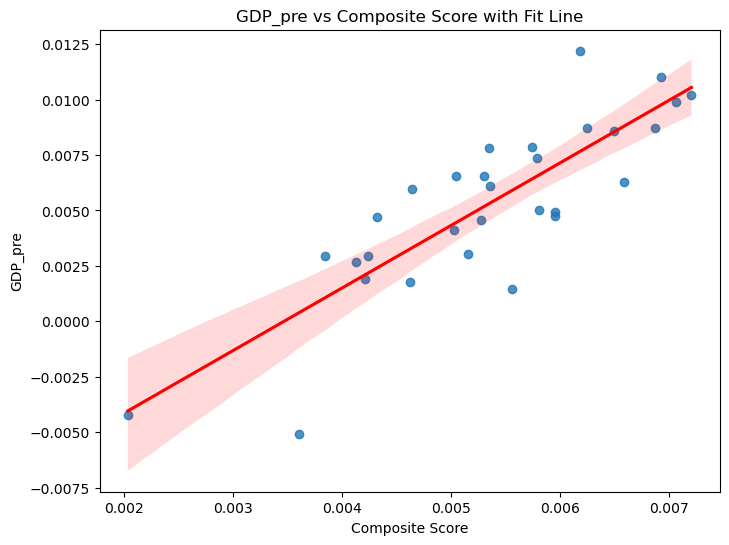

In [20]:
plt.figure(figsize=(8,6))
sns.regplot(x='composite_score', y='GDP_pre', data=state_gdp_mean, line_kws={"color": "red"})
plt.xlabel('Composite Score')
plt.ylabel('GDP_pre')
plt.title('GDP_pre vs Composite Score with Fit Line')
plt.show()

In [26]:
# Select independent and dependent variables from state_gdp_mean
X = state_gdp_mean['Group']
y = state_gdp_mean['GDP_pre']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                GDP_pre   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     14.05
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           0.000823
Time:                        00:33:10   Log-Likelihood:                 130.29
No. Observations:                  30   AIC:                            -256.6
Df Residuals:                      28   BIC:                            -253.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.001      3.673      0.0

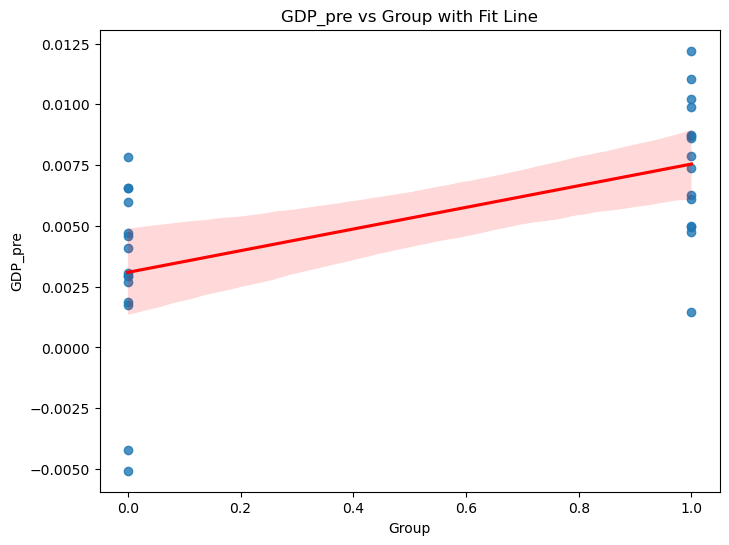

In [27]:
plt.figure(figsize=(8,6))
sns.regplot(x='Group', y='GDP_pre', data=state_gdp_mean, line_kws={"color": "red"})
plt.xlabel('Group')
plt.ylabel('GDP_pre')
plt.title('GDP_pre vs Group with Fit Line')
plt.show()

In [21]:
agg_diffs = merged_panel.groupby("State")[["assetquality_diff", "profitability_diff", "low_diff"]].mean().reset_index()
state_gdp_mean = state_gdp_mean.merge(agg_diffs, on="State", how="left")
state_gdp_mean

,State,GDP_pre,composite_score,assetquality_diff,profitability_diff,low_diff
0,alabama,0.003042,0.005159,0.001757,-0.006774,0.007692
1,alaska,0.005985,0.004643,0.002228,-0.001624,0.016923
2,california,0.007819,0.005348,0.007308,-0.007459,0.000000
3,colorado,0.006285,0.006588,0.000779,0.000816,0.000000
4,connecticut,0.008596,0.006502,0.000282,0.000326,0.007692
5,florida,0.002948,0.004238,0.007302,-0.007782,0.016923
6,georgia,0.001885,0.004212,0.001882,0.004564,0.016923
7,idaho,0.007858,0.005746,0.001993,-0.002279,0.016923
8,illinois,0.002948,0.003851,0.003228,-0.004358,0.007692
9,indiana,0.006117,0.005356,0.001446,-0.000734,0.000000


                    assetquality_diff  profitability_diff  low_diff  \
assetquality_diff            1.000000           -0.492029  0.289797   
profitability_diff          -0.492029            1.000000 -0.017405   
low_diff                     0.289797           -0.017405  1.000000   
composite_score              0.002628            0.163835 -0.151053   

                    composite_score  
assetquality_diff          0.002628  
profitability_diff         0.163835  
low_diff                  -0.151053  
composite_score            1.000000  


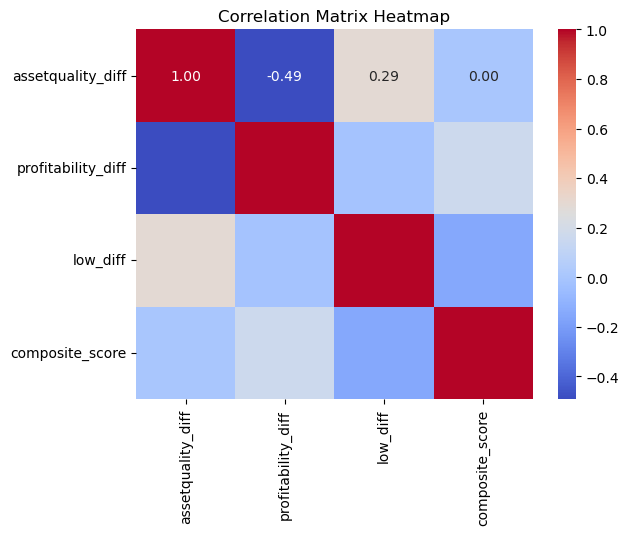

In [23]:
corr_matrix = state_gdp_mean[['assetquality_diff', 'profitability_diff', 'low_diff', 'composite_score']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

                    assetquality_diff  profitability_diff  low_diff     Group
assetquality_diff            1.000000           -0.492029  0.289797  0.005717
profitability_diff          -0.492029            1.000000 -0.017405  0.208802
low_diff                     0.289797           -0.017405  1.000000 -0.212900
Group                        0.005717            0.208802 -0.212900  1.000000


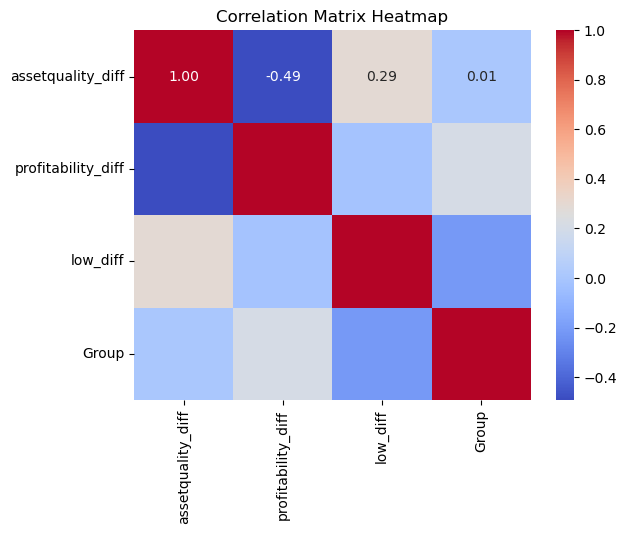

In [28]:
corr_matrix = state_gdp_mean[['assetquality_diff', 'profitability_diff', 'low_diff', 'Group']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [25]:
state_gdp_mean["Group"] = (state_gdp_mean["composite_score"] > median_composite_score).astype(int)
state_gdp_mean

,State,GDP_pre,composite_score,assetquality_diff,profitability_diff,low_diff,Group
0,alabama,0.003042,0.005159,0.001757,-0.006774,0.007692,0
1,alaska,0.005985,0.004643,0.002228,-0.001624,0.016923,0
2,california,0.007819,0.005348,0.007308,-0.007459,0.000000,0
3,colorado,0.006285,0.006588,0.000779,0.000816,0.000000,1
4,connecticut,0.008596,0.006502,0.000282,0.000326,0.007692,1
5,florida,0.002948,0.004238,0.007302,-0.007782,0.016923,0
6,georgia,0.001885,0.004212,0.001882,0.004564,0.016923,0
7,idaho,0.007858,0.005746,0.001993,-0.002279,0.016923,1
8,illinois,0.002948,0.003851,0.003228,-0.004358,0.007692,0
9,indiana,0.006117,0.005356,0.001446,-0.000734,0.000000,1


In [29]:
# Prepare independent and dependent variables
X_logit = state_gdp_mean[["assetquality_diff", "profitability_diff", "low_diff"]]
X_logit = sm.add_constant(X_logit)  # add intercept
y_logit = state_gdp_mean["Group"]

# Run logistic regression
logit_model = sm.Logit(y_logit, X_logit)
result = logit_model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.625772
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Group   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                 0.09720
Time:                        00:37:20   Log-Likelihood:                -18.773
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                    0.2569
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6812      0.662      1.029      0.304      -0.617       1.979
asset

In [30]:
# Use state_gdp_mean for the regression. 
# 1) Fit an OLS model to predict composite_score from assetquality_diff, profitability_diff, and low_diff.
X_reg = sm.add_constant(state_gdp_mean[['assetquality_diff', 'profitability_diff', 'low_diff']])
y_reg = state_gdp_mean['composite_score']
ols_model = sm.OLS(y_reg, X_reg).fit()
print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:        composite_score   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.6705
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.578
Time:                        00:42:46   Log-Likelihood:                 161.65
No. Observations:                  30   AIC:                            -315.3
Df Residuals:                      26   BIC:                            -309.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0056      0

In [31]:
# 2) Get the predicted composite scores
predicted_composite = ols_model.predict(X_reg)

# 3) Predict Group based on the median of predicted composite scores
median_predicted = np.median(predicted_composite)
predicted_group = (predicted_composite > median_predicted).astype(int)

# 4) Calculate the accuracy compared to the actual Group
accuracy = np.mean(predicted_group == state_gdp_mean['Group'])
print("Accuracy based on group predictions:", accuracy)

Accuracy based on group predictions: 0.7333333333333333


In [32]:
state_gdp_mean.to_csv('group_supervised.csv', index=False)